# Exploring Pandas with NYC Flights Dataset

R users will recognize this famous
dataset as a favorite of Hadley Wickham, author of dplyr.  No matter, we can use
it with pandas as
well.

This dataset will give us flight delay data from all
flights departing from the three NYC airports (JFK, LGA, EWR) in the year 2013.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# get data
import os
import urllib.request

data_location = "../data/nycflights13/flights.csv.gz"
data_url = 'https://elephantscale-public.s3.amazonaws.com/data/nycflights13/flights.csv.gz'

if not os.path.exists (data_location):
    data_location = 'flights.csv.gz'
    print("Downloading : ", data_url)
    urllib.request.urlretrieve(data_url, data_location)
print ('data_location: ', data_location)

data_location:  ../data/nycflights13/flights.csv.gz


In [9]:
pd.options.display.float_format = '{:,.2f}'.format
df = pd.read_csv(data_location)
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.00,545,-1.00,"1,004.00",1022,-18.00,B6,725,N804JB,JFK,BQN,183.00,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,461,N668DN,LGA,ATL,116.00,762,6,0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,nan,1455,nan,nan,1634,nan,9E,3393,NaN,JFK,DCA,nan,213,14,55,2013-09-30 14:00:00
336772,2013,9,30,nan,2200,nan,nan,2312,nan,9E,3525,NaN,LGA,SYR,nan,198,22,0,2013-09-30 22:00:00
336773,2013,9,30,nan,1210,nan,nan,1330,nan,MQ,3461,N535MQ,LGA,BNA,nan,764,12,10,2013-09-30 12:00:00
336774,2013,9,30,nan,1159,nan,nan,1344,nan,MQ,3572,N511MQ,LGA,CLE,nan,419,11,59,2013-09-30 11:00:00


Let us focus on some summary and visualizations that we can do here. Let's start
out by finding the average delay by month.  We'll also do a matlibplot on it.

In [4]:
mean_delay_by_month = df.groupby(['month'])['arr_delay'].mean()
mean_delay_by_month

month
1      6.129972
2      5.613019
3      5.807577
4     11.176063
5      3.521509
6     16.481330
7     16.711307
8      6.040652
9     -4.018364
10    -0.167063
11     0.461347
12    14.870355
Name: arr_delay, dtype: float64

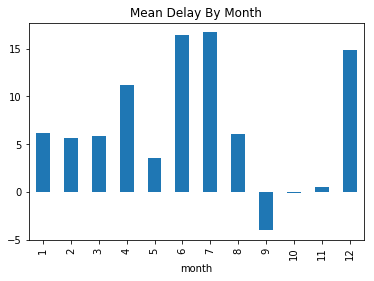

In [5]:
mean_month_plt = mean_delay_by_month.plot(kind='bar', title="Mean Delay By Month")
mean_month_plt

Notice that flights in two months actually have negative delay.  No doubt
airlines "pad" flight times to achieve better results.

One would guess that
flights to certain airports may have different results. For example, flights to
Chicago (ORD) would no doubt be affected by winter weather. Let's take a look at
that.

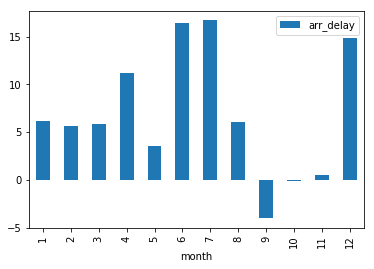

In [16]:
df[['arr_delay', 'month']].groupby('month').mean().plot(kind='bar')


In [10]:
mean_delay_by_month_ord = df[(df.dest == 'ORD')].groupby(['month'])['arr_delay'].mean()
mean_delay_by_month_ord


month
1      7.287694
2      3.680794
3     -2.702473
4     19.179352
5      7.938280
6     13.299376
7      8.405514
8      4.256851
9     -4.745370
10    -1.597090
11     2.071058
12    16.462817
Name: arr_delay, dtype: float64

Flights to Chicago (ORD)
month
1      7.287694
2      3.680794
3     -2.702473
4     19.179352
5      7.938280
6     13.299376
7      8.405514
8      4.256851
9     -4.745370
10    -1.597090
11     2.071058
12    16.462817
Name: arr_delay, dtype: float64


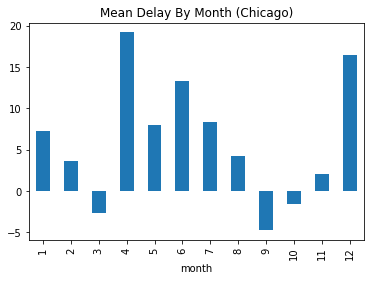

In [6]:
mean_delay_by_month_ord = df[(df.dest == 'ORD')].groupby(['month'])['arr_delay'].mean()
print("Flights to Chicago (ORD)")
print(mean_delay_by_month_ord)

mean_month_plt_ord = mean_delay_by_month_ord.plot(kind='bar', title="Mean Delay By Month (Chicago)")
mean_month_plt_ord


Flights to Los Angeles (LAX)
month
1     -4.160312
2     -7.601824
3     -5.280928
4      3.085153
5     -7.150657
6     13.007027
7      8.191432
8      1.028667
9     -8.719044
10    -1.205694
11    -0.103290
12    10.724460
Name: arr_delay, dtype: float64


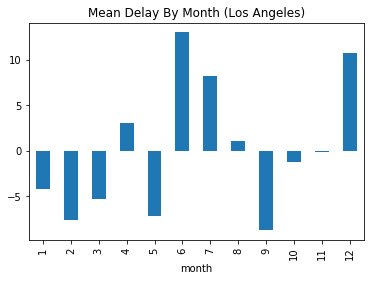

In [7]:
# Let's try Los Angeles and compare that

mean_delay_by_month_lax = df[(df.dest == 'LAX')].groupby(['month'])['arr_delay'].mean()
print("Flights to Los Angeles (LAX)")
print(mean_delay_by_month_lax)

mean_month_plt_lax = mean_delay_by_month_lax.plot(kind='bar', title="Mean Delay By Month (Los Angeles)")
mean_month_plt_lax

Perhaps we would like to see which Airline carrier is the best for delays.  Here
we have some plots to do that.

In [ ]:
# Examine if specific carrier will create different delay impact
df[['carrier','arr_delay']].groupby('carrier').mean().plot(kind='bar', figsize =(12,8))
plt.xticks(rotation=0)
plt.xlabel('Carrier')
plt.ylabel('Average Delay in Min')
plt.title('Average Arrival Delay by Carrier in 2008, All  airports')


df[['carrier','dep_delay']].groupby('carrier').mean().plot(kind='bar', figsize =(12,8))
plt.xticks(rotation=0)
plt.xlabel('Carrier')
plt.ylabel('Average Delay in Min')
plt.title('Average Departure Delay by Carrier in 2008, All  airports')


We see that F9 (Frontier Airlines) is among the worst in terms of delays, while
Hawaiian (HA) is among the best.

### Joins

We have a couple of other tables in our dataset: Weather, and
airports. Let's look at these two tables and see if we can perform joins.

In [ ]:
weather = pd.read_csv('https://elephantscale-public.s3.amazonaws.com/data/nycflights13/weather.csv.gz')
weather

In [ ]:
df_withweather = pd.merge(df, weather, how='left', on=['year','month', 'day', 'hour', 'origin'])
df_withweather

In [ ]:
airports = pd.read_csv('https://elephantscale-public.s3.amazonaws.com/data/nycflights13/airports.csv.gz')
airports

In [ ]:
df_withairport = pd.merge(df_withweather, airports, how='left', left_on='dest', right_on='faa')
df_withairport